In [58]:
import os 
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

os.chdir('/home/melissa/PROJECT_DIRECTORIES/GRIN2B/scripts')
%run plotting.py

# Palette Color Variations

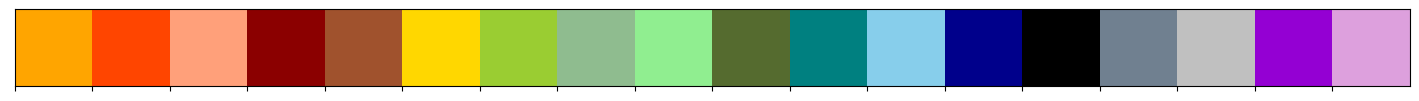

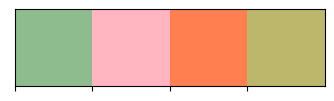

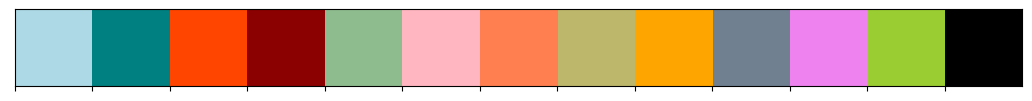

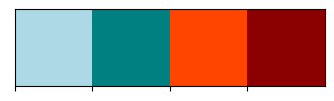

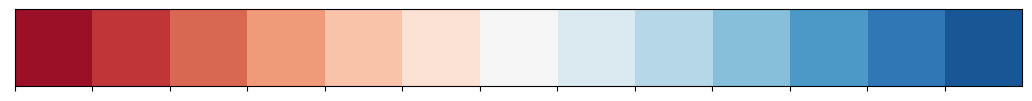

In [2]:
wt_id_colors = ['orange', 'orangered','lightsalmon','darkred','sienna', 'gold','yellowgreen','darkseagreen','lightgreen','darkolivegreen',
         'teal', 'skyblue', 'darkblue','black', 'slategrey', 'silver', 'darkviolet', 'plum']
sns.palplot(wt_id_colors)
royal = ['darkseagreen', 'lightpink', 'coral', 'darkkhaki']
darjeeling = ['orange', 'lightgreen', 'skyblue', 'plum']
bright = ['lightblue', 'teal', 'orangered', 'darkred']
channels = ['lightblue', 'teal', 'orangered', 'darkred', 'darkseagreen', 
                 'lightpink', 'coral', 'darkkhaki', 'orange', 'slategrey', 'violet', 'yellowgreen', 'black']
sns.palplot(royal)
sns.palplot(channels[0:13])
sns.palplot(bright)
diverging_colors = sns.color_palette("RdBu", 13)
sns.palplot(diverging_colors)

colors_dict= {0 : 'teal', 2 :'orangered', 3 : 'orangered', 4: 'orangered', 5: 'darkred',
              6 : 'darkred', 7 : 'teal', 8: 'darkred', 9:'darkred', 10: 'teal',
              11: 'orangered', 12: 'orangered', 13: 'orangered', 15 : 'teal'}



# IDs for sleepstages excluding seizure epochs

In [3]:
GRIN_wt_IDs = ['378','382', '383', '401','402','404', '430','140','132',
               '238','240','362','363','365','366','369','371','375']
len(GRIN_wt_IDs)

18

In [4]:
GRIN_het_IDs = ['131', '130', '129', '228', '227', '229', '373', '138', '137',
                '139','236', '237', '239', '241', '364', '367', '368', '424',
                '433']
len(GRIN_het_IDs)

19

In [5]:
br_animal_IDs = ['378', '382', '383', '401', '402', '404','424', '430','433',
                '140', '129', '130', '131', '132', '137','138', '139', '227',
                '228', '229', '236', '237', '238', '239', '240', '241', '362',
                '363', '364', '365', '366', '367', '368', '369', '371', '373', '375'] 
len(br_animal_IDs)

37

In [6]:
wt_list_to_plot = []

for id in range(0, len(GRIN_wt_IDs)-1, 2):
    wt_list_to_plot.append([int(GRIN_wt_IDs[id]), int(GRIN_wt_IDs[id + 1])])

In [7]:
het_list_to_plot = []

for id in range(0, len(GRIN_het_IDs)-1, 2):
    het_list_to_plot.append([int(GRIN_het_IDs[id]), int(GRIN_het_IDs[id + 1])])

# Path to folder to save data 

In [13]:
save_path = '/home/melissa/RESULTS/GRIN2B/PAPER/PLOTS/Gender/'

# Wake Data

In [14]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/WAKE/harmonics_algo/test_5/het/')
het_wake = pd.read_csv('GRIN2B_het_animals_harmonics_algo.csv')

os.chdir('/home/melissa/RESULTS/GRIN2B/Power/WAKE/harmonics_algo/test_5/wt/')
wt_wake = pd.read_csv('GRIN2B_wt_animals_harmonics_algo.csv')

wake = pd.concat([het_wake, wt_wake])

# Non-REM Data

In [38]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/NREM/')
nrem = pd.read_csv('NREM_filtered_data_old_algo.csv')

# REM Data 

In [39]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/REM/')
rem = pd.read_csv('REM_filtered_data_jan_23.csv')

# Seizure Data 

In [40]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/seizures/')
seizure = pd.read_csv('seizure_GRIN2B_power.csv')

In [41]:
channel_2_seizures = seizure_df.loc[seizure_df['Channel'] == 2]
channel_2_seizures

,Unnamed: 0,Animal_ID,Channel,Power,Frequency,Genotype
126,126,378,2,1.118464e+01,0.0000,WT
127,127,378,2,4.391582e+01,1.0016,WT
128,128,378,2,2.430588e+01,2.0032,WT
129,129,378,2,2.510214e+01,3.0048,WT
130,130,378,2,5.157363e+01,4.0064,WT
...,...,...,...,...,...,...
79627,79627,373,2,3.258188e-07,121.1936,GRIN2B
79628,79628,373,2,2.729755e-07,122.1952,GRIN2B
79629,79629,373,2,2.374553e-07,123.1968,GRIN2B
79630,79630,373,2,2.169815e-07,124.1984,GRIN2B


# Add genotype to sleepstage dataframe 

In [42]:
sleepstage = [rem, nrem, wake, seizure]

In [43]:
for stage in sleepstage:
    genotype = []
    for animal in stage['Animal_ID']:
        if str(animal) in GRIN_het_IDs:
            genotype.append('GRIN2B')
        elif str(animal) in GRIN_wt_IDs:
            genotype.append('WT')
        
    stage['Genotype'] = genotype

## Add gender to sleepstage dataframe

In [21]:
GRIN_m_het_IDs = ['131', '130', '129', '228', '227', '229', '373', '424', '433']
GRIN_f_het_IDs = ['138', '137','139','236', '237', '239', '241', '364', '367', '368']
GRIN_m_wt_IDs = ['132', '362', '363', '375', '378', '382', '383', '430']
GRIN_f_wt_IDs = ['140', '238','240', '365', '366', '369', '371', '401', '402', '404']

In [53]:
for stage in sleepstage:
    gender = []
    for animal in stage['Animal_ID']:
        if str(animal) in GRIN_m_het_IDs:
            gender.append('Male GRIN2B Het')
        elif str(animal) in GRIN_f_het_IDs:
            gender.append('Female GRIN2B Het')
        elif str(animal) in GRIN_m_wt_IDs:
            gender.append('Male Wildtype')
        elif str(animal) in GRIN_f_wt_IDs:
            gender.append('Female Wildtype')
        
    stage['Gender'] = gender

In [54]:
channels = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]

## Round frequency column to first decimal point

In [46]:
for stage in sleepstage:    
    x = stage['Frequency'].round(1).tolist()
    stage['Frequency_2'] = x

# Genotype differences in one channel

In [25]:
save_directory_test = '/home/melissa/RESULTS/GRIN2B/PAPER/PLOTS/Test'

## select channel

In [55]:
chan_2_wake = wake.loc[wake['Channel'] == 2]
chan_2_nrem = nrem.loc[nrem['Channel'] == 2]
chan_2_rem = rem.loc[rem['Channel'] == 2]
chan_2_seizure = seizure.loc[seizure['Channel'] == 2]

## WAKE

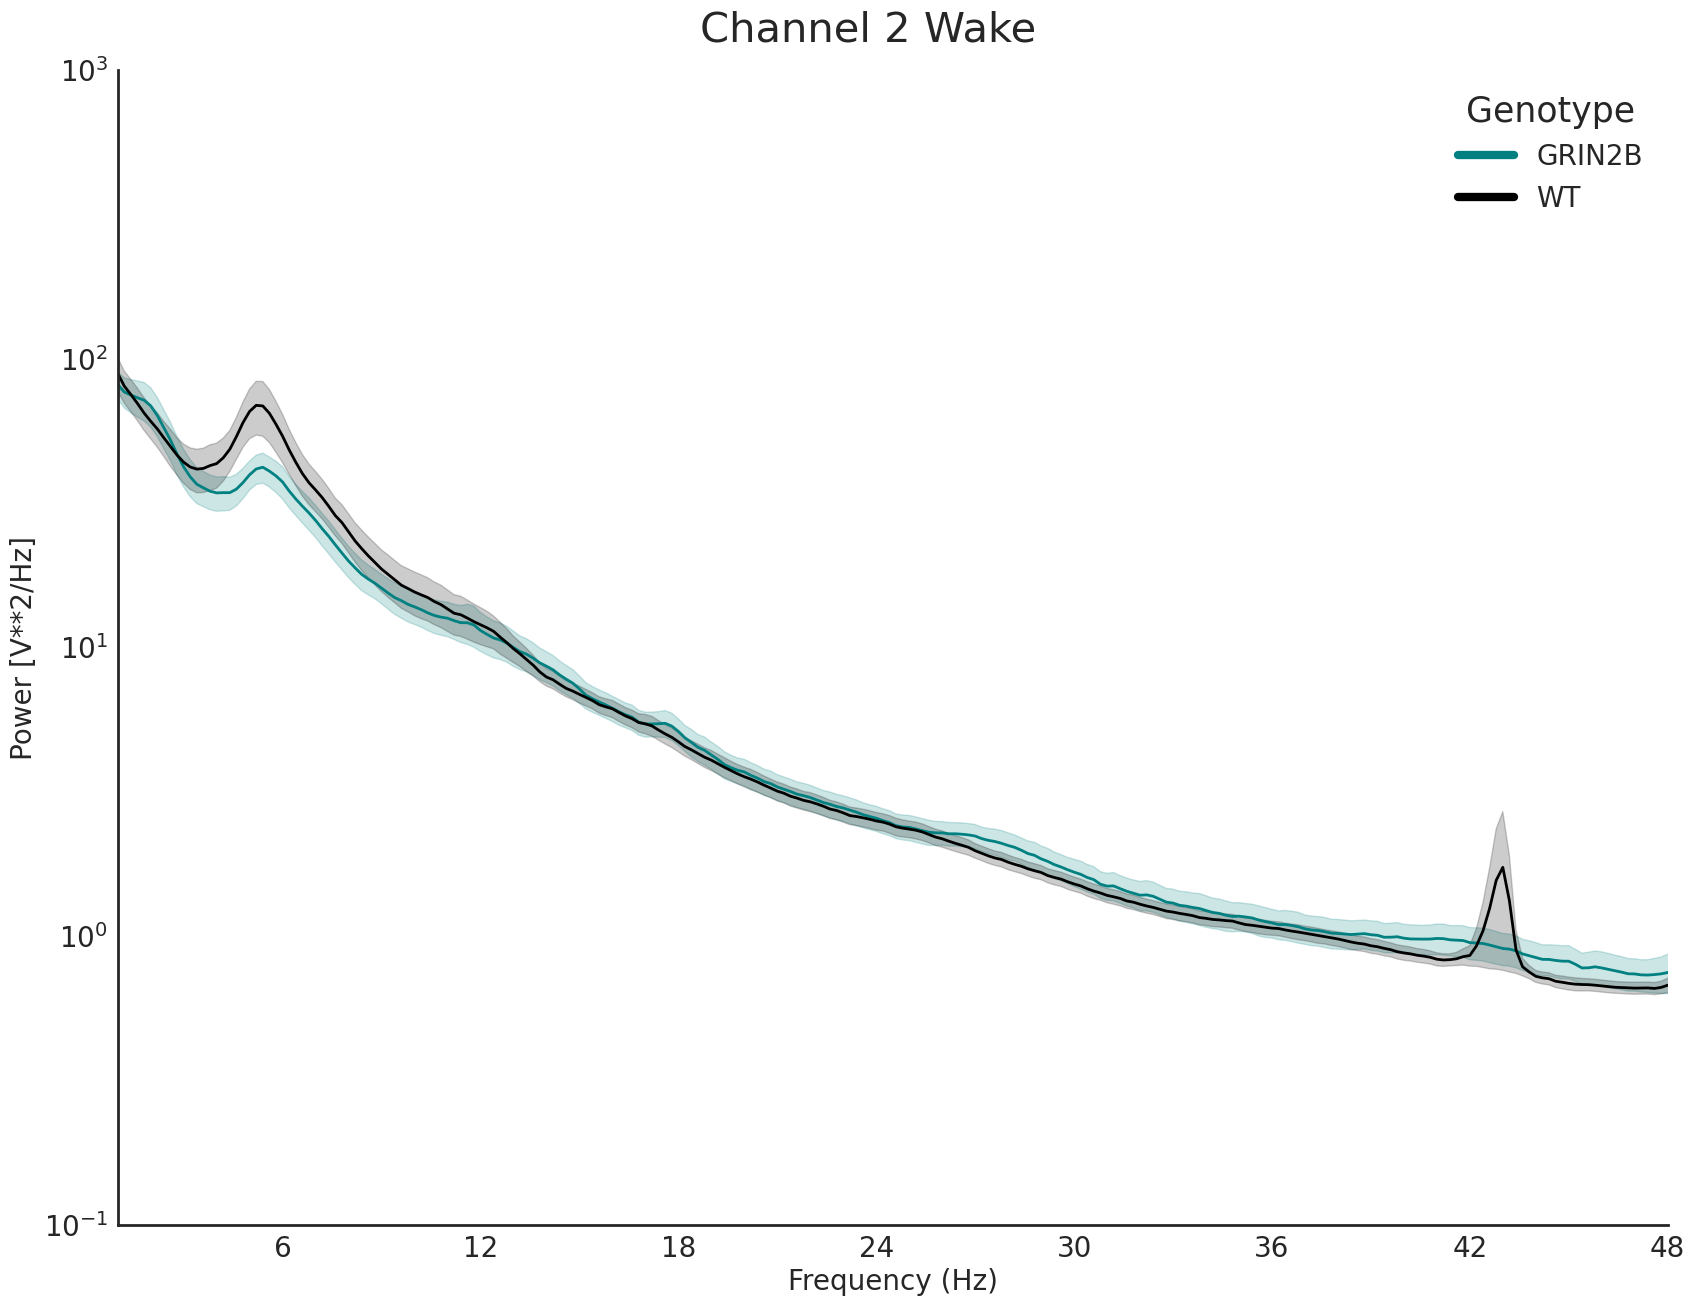

In [34]:
plotting = PlottingGRIN2B()
plotting.plot_genotype_average_by_channel(data_to_plot = chan_2_wake, channel = 2, sleepstage = 'Wake',
                                          save_directory = save_directory_test, seizure = False)

## Non-REM

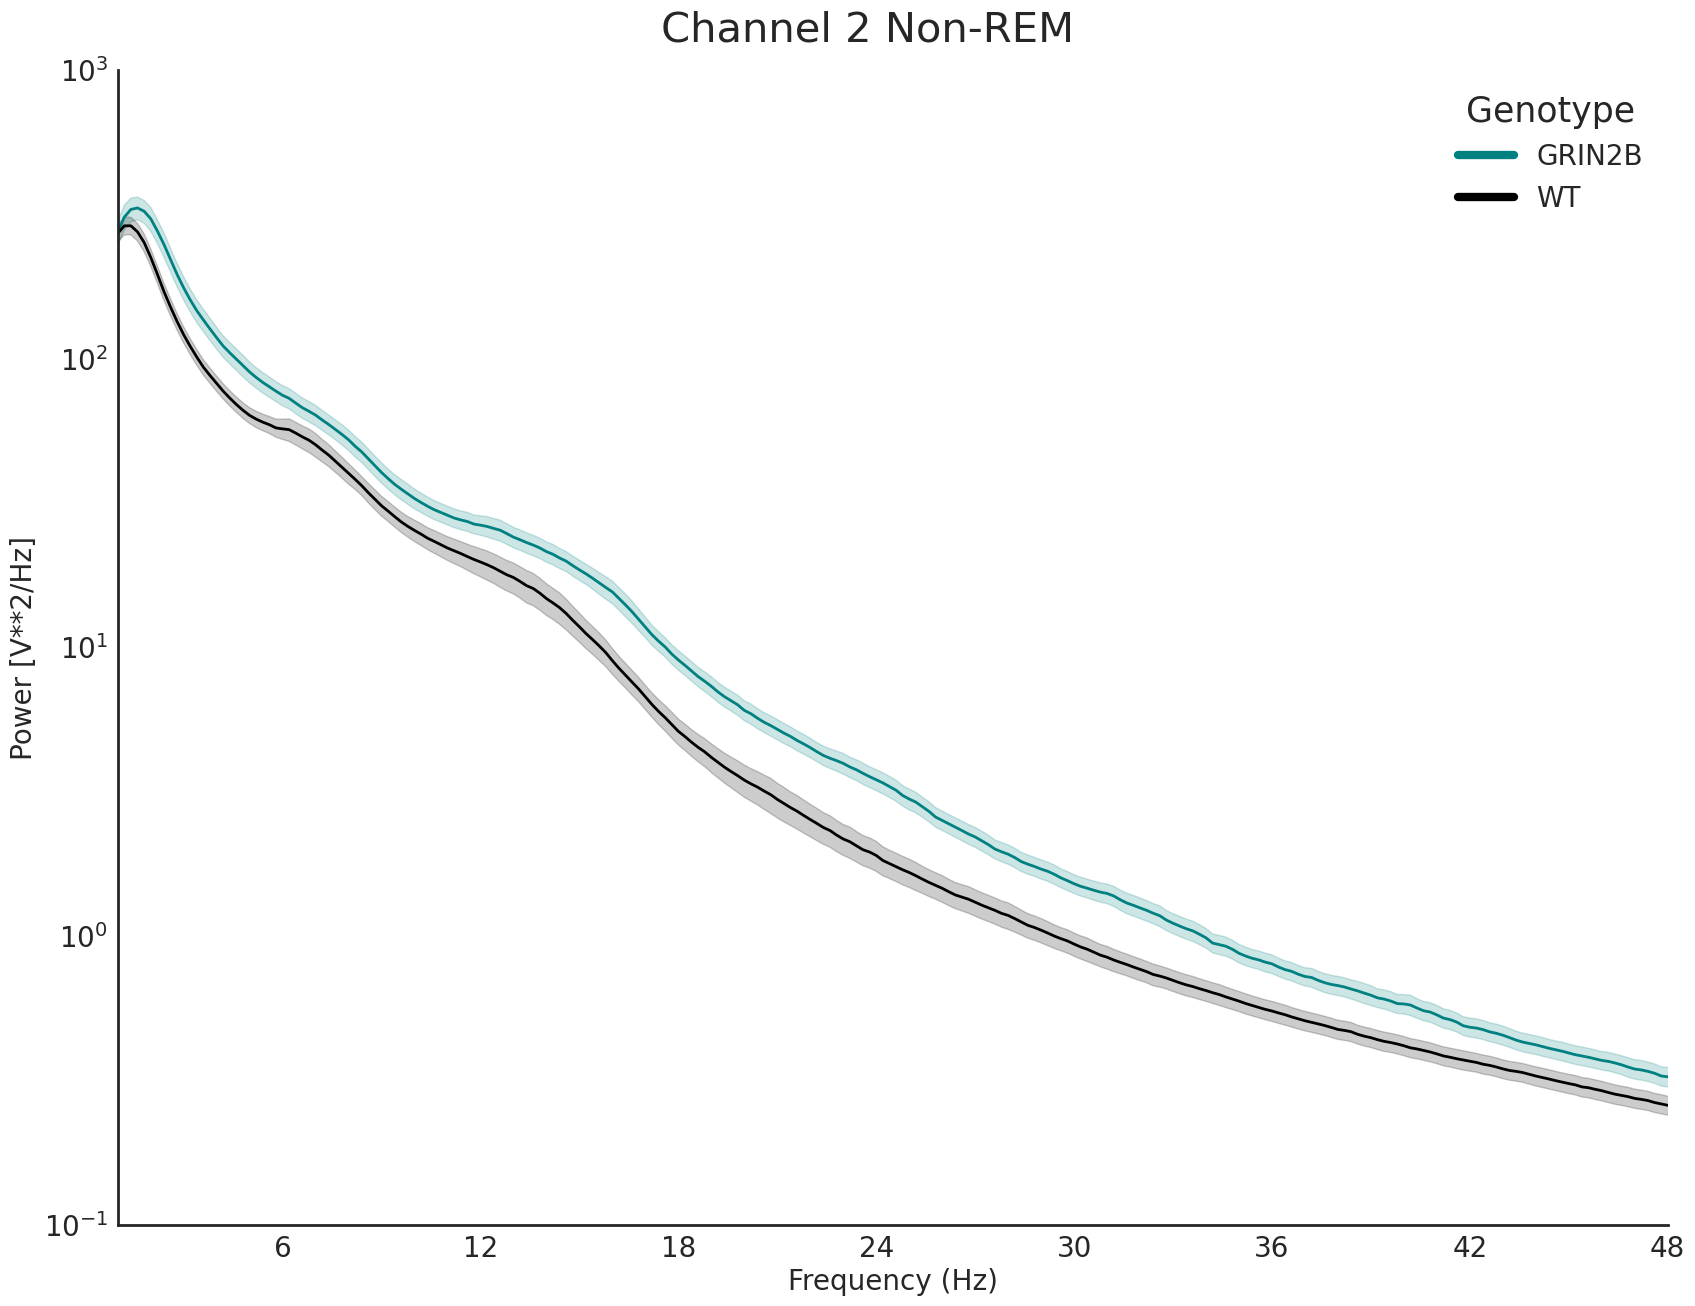

In [50]:
plotting = PlottingGRIN2B()
plotting.plot_genotype_average_by_channel(data_to_plot = chan_2_nrem, channel = 2, sleepstage = 'Non-REM',
                                          save_directory = save_directory_test, seizure = False)

## REM

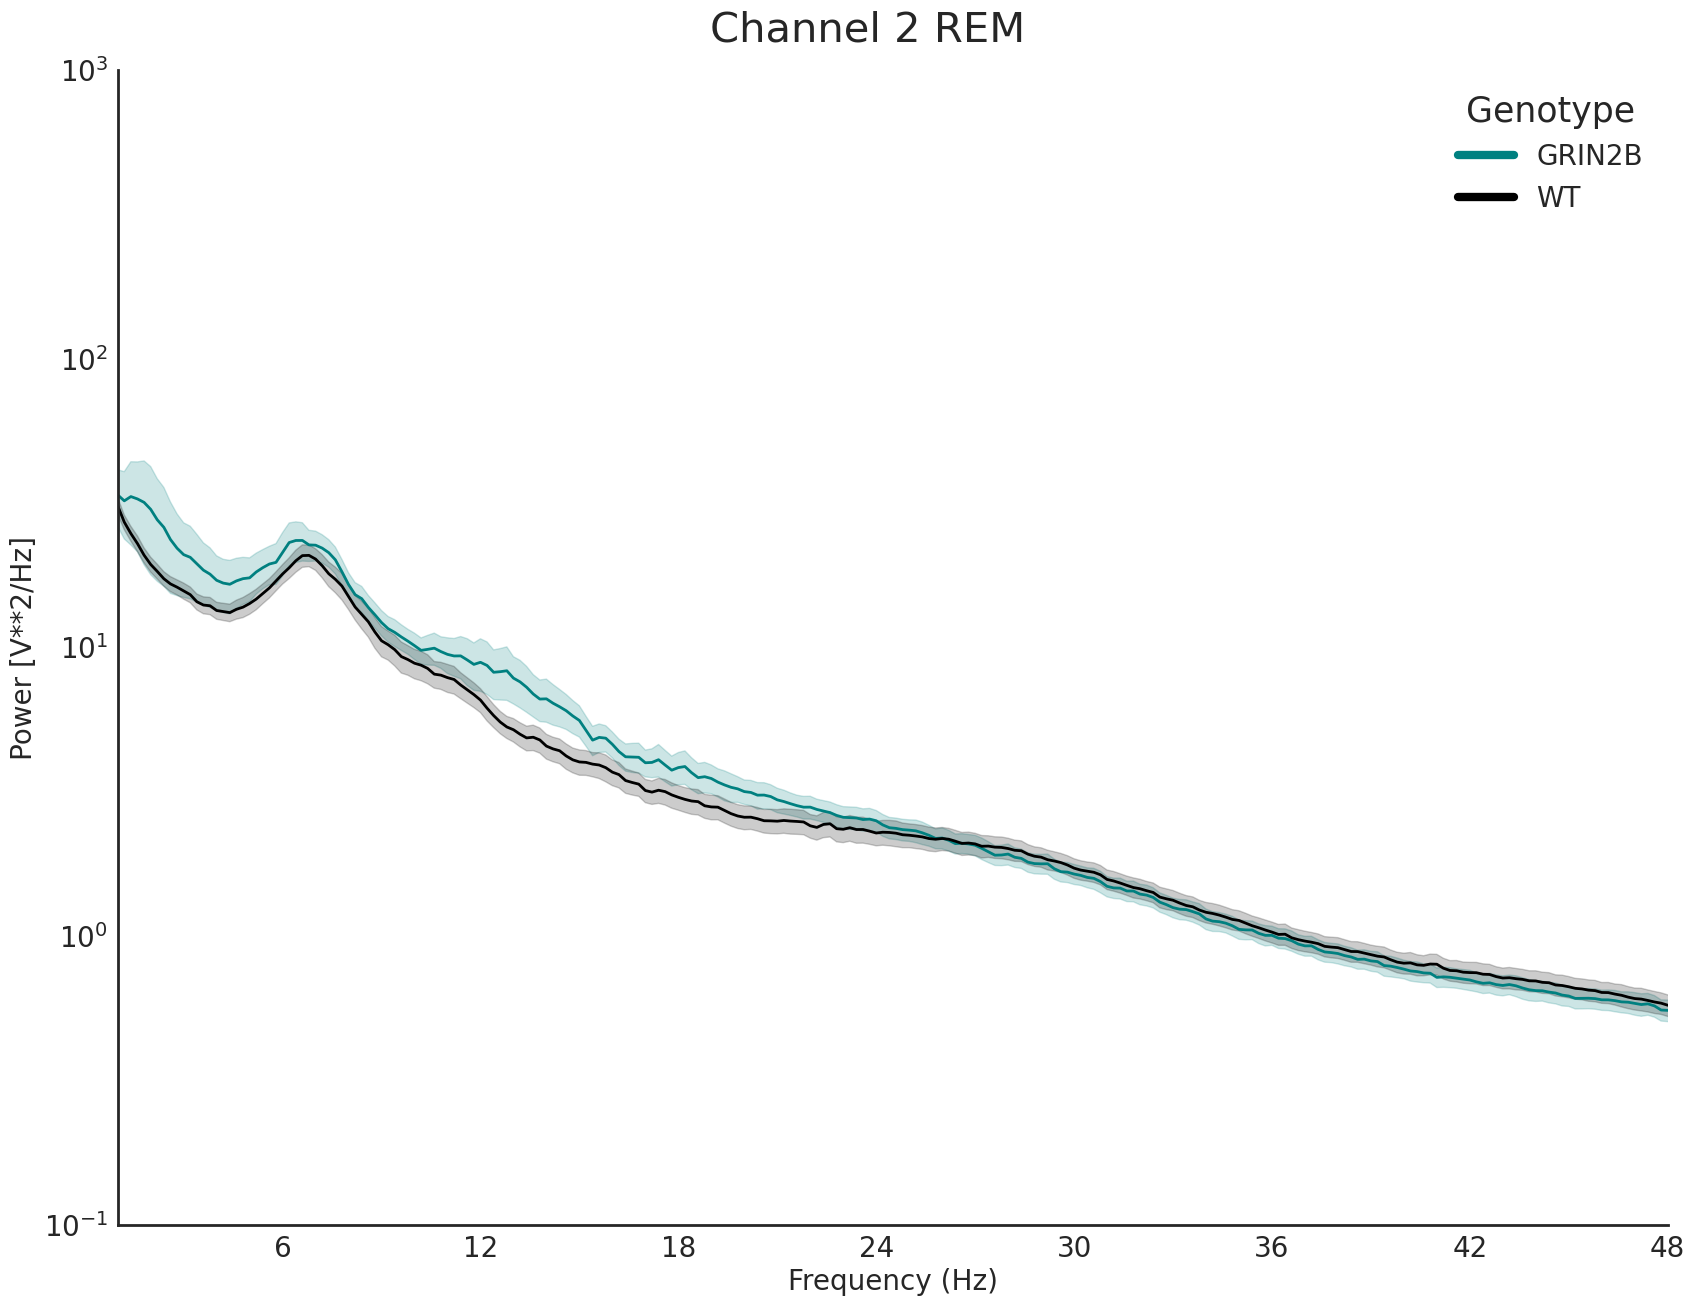

In [51]:
plotting = PlottingGRIN2B()
plotting.plot_genotype_average_by_channel(data_to_plot = chan_2_rem, channel = 2, sleepstage = 'REM',
                                          save_directory = save_directory_test, seizure = False)

# Seizure 

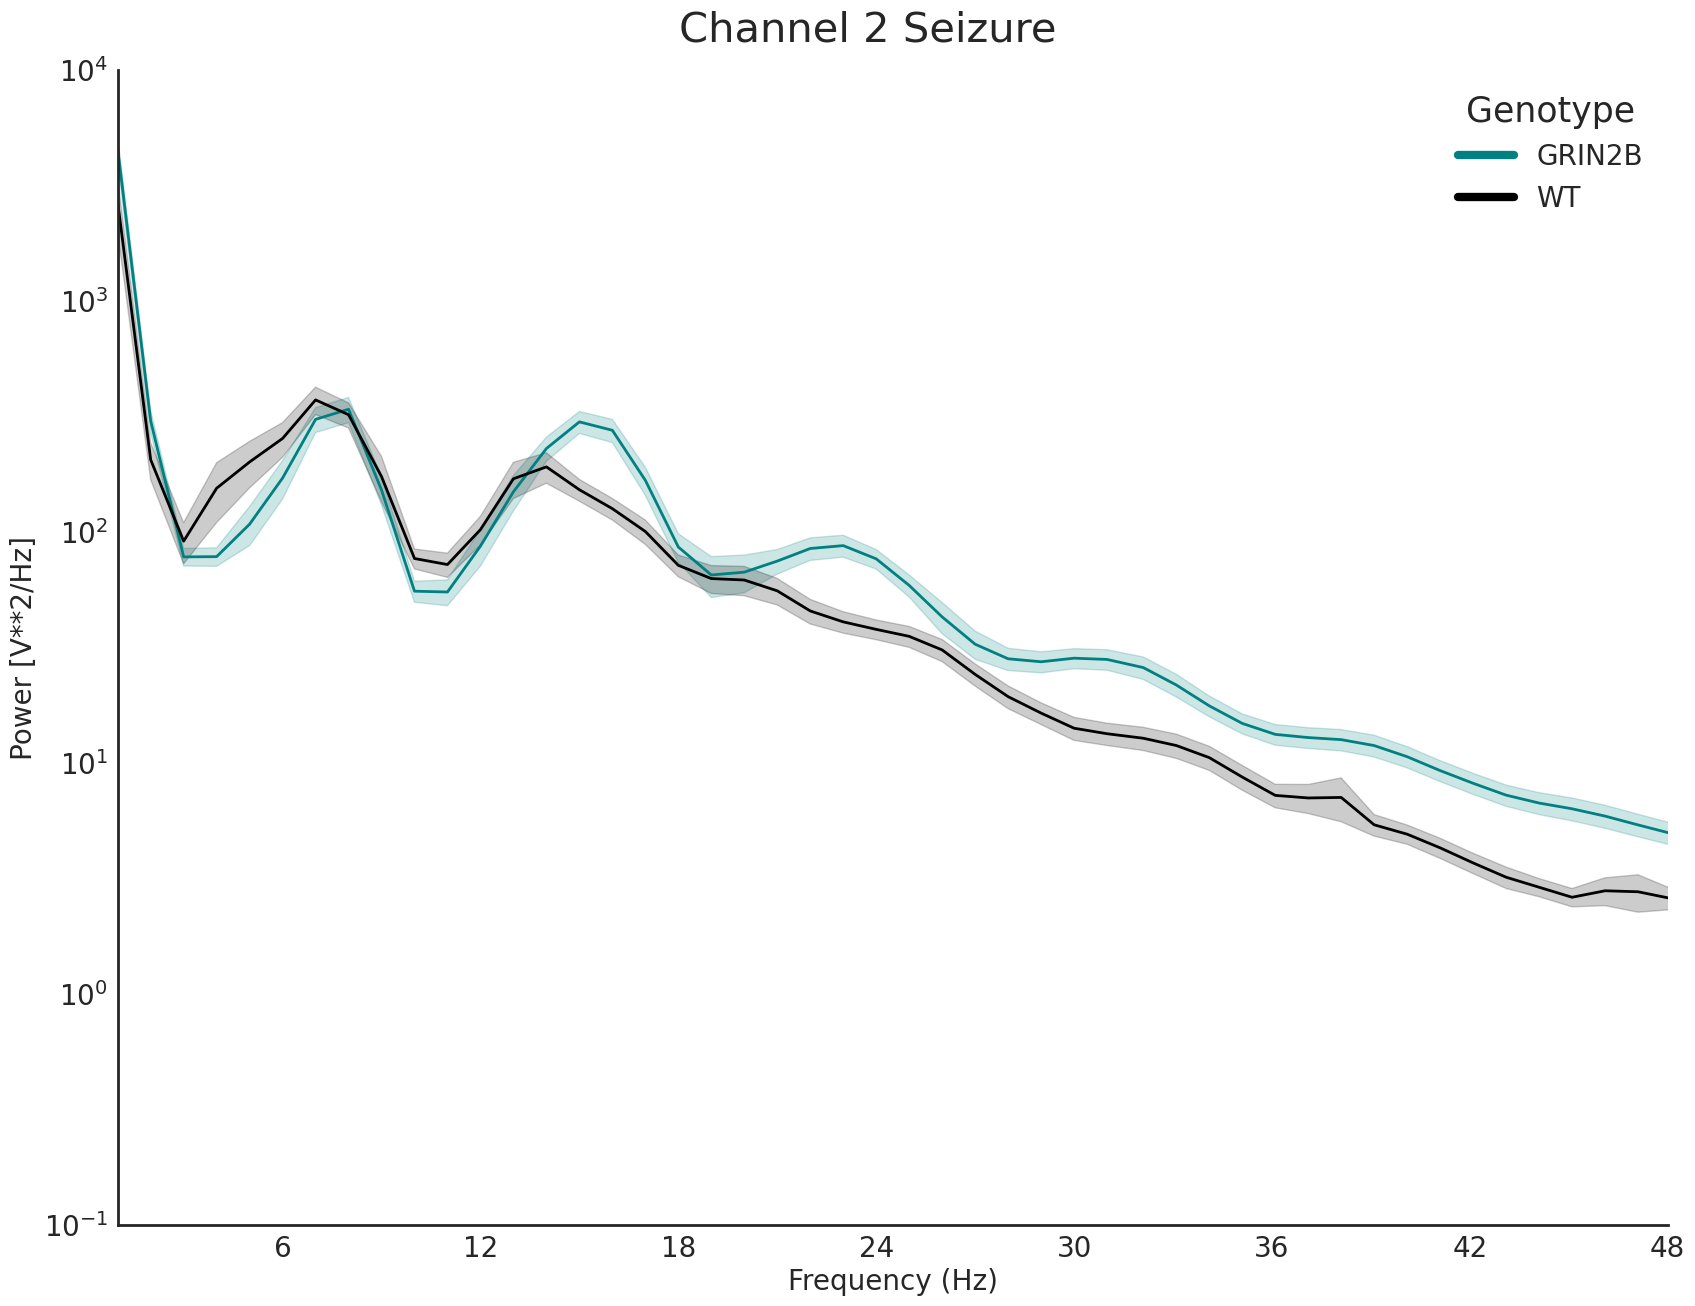

In [29]:
plotting = PlottingGRIN2B()
plotting.plot_genotype_average_by_channel(data_to_plot = chan_2_seizure, channel = 2, sleepstage = 'Seizure',
                                          save_directory = save_directory_test, seizure = True)

# Plot differences in sleepstage by gender

In [56]:
female_data_rem = rem[rem['Gender'].isin(['Female Wildtype', 'Female GRIN2B Het'])]
female_data_chan_2_rem = female_data_rem.loc[female_data_rem['Channel'] == 2]
male_data_rem = rem[rem['Gender'].isin(['Male Wildtype', 'Male GRIN2B Het'])]
male_data_chan_2_rem = male_data_rem.loc[male_data_rem['Channel'] == 2]

female_data_nrem = nrem[nrem['Gender'].isin(['Female Wildtype', 'Female GRIN2B Het'])]
female_data_chan_2_nrem = female_data_nrem.loc[female_data_nrem['Channel'] == 2]
male_data_nrem = nrem[nrem['Gender'].isin(['Male Wildtype', 'Male GRIN2B Het'])]
male_data_chan_2_nrem = male_data_nrem.loc[male_data_nrem['Channel'] == 2]

female_data_wake = wake[wake['Gender'].isin(['Female Wildtype', 'Female GRIN2B Het'])]
female_data_chan_2_wake = female_data_wake.loc[female_data_wake['Channel'] == 2]
male_data_wake = wake[wake['Gender'].isin(['Male Wildtype', 'Male GRIN2B Het'])]
male_data_chan_2_wake = male_data_wake.loc[male_data_wake['Channel'] == 2]


female_data_seizure = seizure[seizure['Gender'].isin(['Female Wildtype', 'Female GRIN2B Het'])]
female_data_chan_2_seizure = female_data_seizure.loc[female_data_seizure['Channel'] == 2]
male_data_seizure = seizure[seizure['Gender'].isin(['Male Wildtype', 'Male GRIN2B Het'])]
male_data_chan_2_seizure = male_data_seizure.loc[male_data_seizure['Channel'] == 2]

In [64]:
##save gender dataframes 
os.chdir('/home/melissa/RESULTS/GRIN2B/PAPER/DATASETS/SEX_DIFFERENCES/')
female_data_chan_2_rem.to_csv('female_data_chan_2_rem.csv')
female_data_chan_2_nrem.to_csv('female_data_chan_2_nrem.csv')
female_data_chan_2_wake.to_csv('female_data_chan_2_wake.csv')
female_data_chan_2_seizure.to_csv('female_data_chan_2_seizure.csv')

male_data_chan_2_rem.to_csv('male_data_chan_2_rem.csv')
male_data_chan_2_nrem.to_csv('male_data_chan_2_nrem.csv')
male_data_chan_2_wake.to_csv('male_data_chan_2_wake.csv')
male_data_chan_2_seizure.to_csv('male_data_chan_2_seizure.csv')



## REM

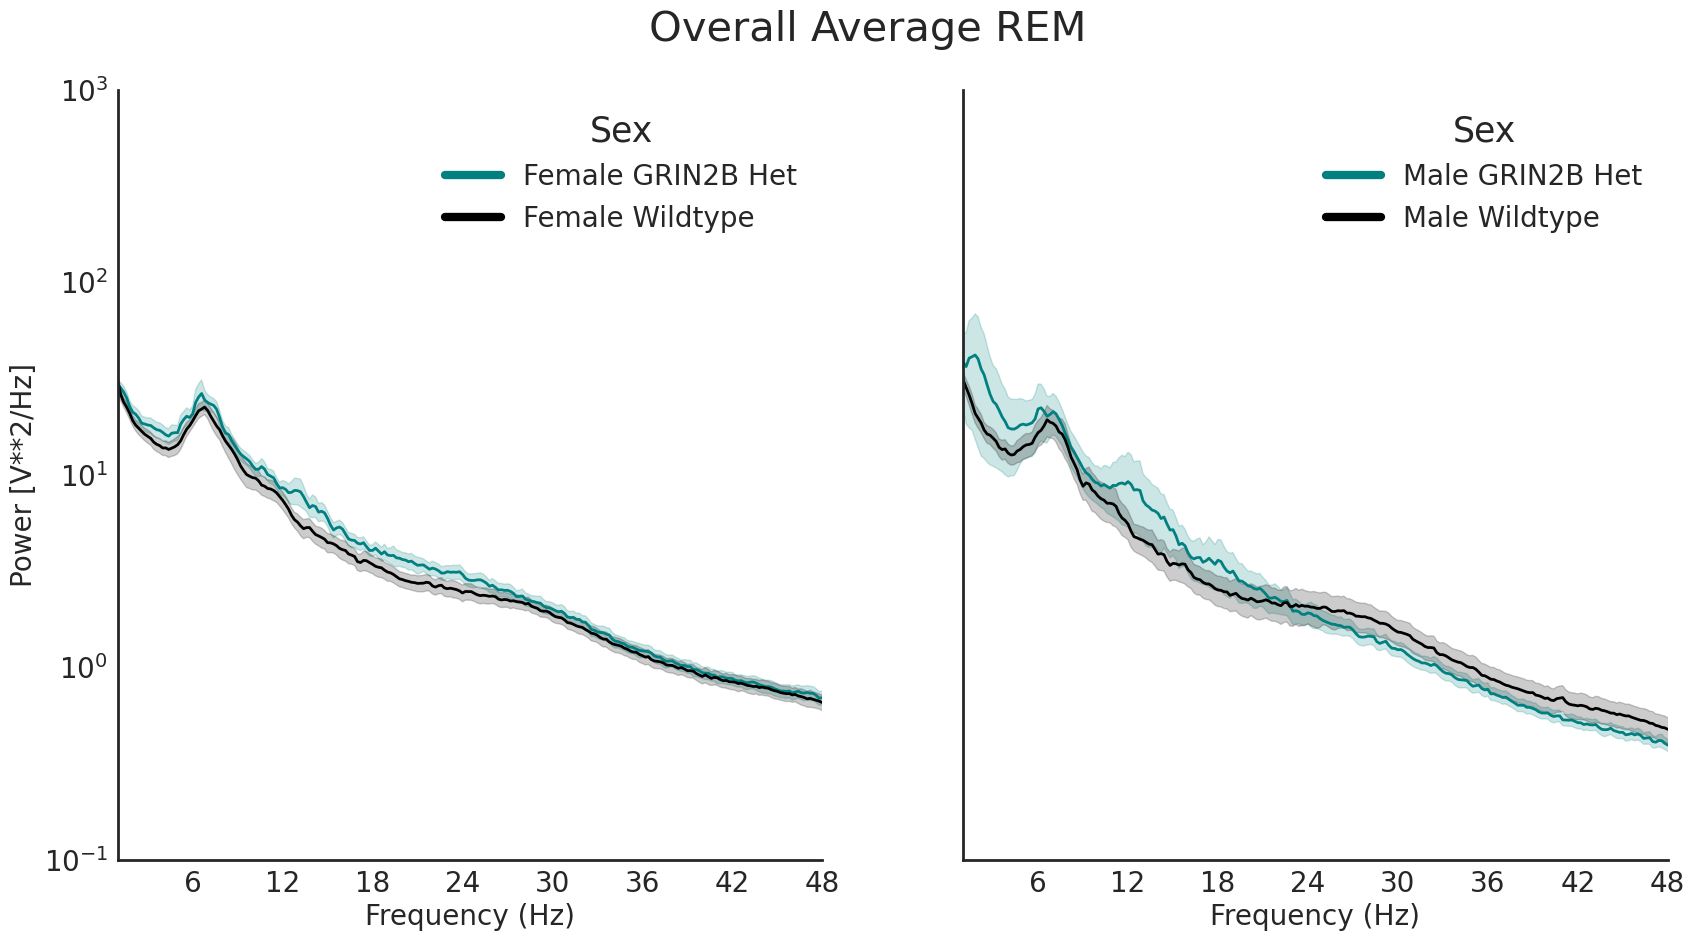

In [63]:
plotting = PlottingGRIN2B()
plotting.genotype_sex_subplots(female_data_chan_2_rem, male_data_chan_2_rem, sleepstage = 'REM', 
                               save_path = save_directory_test, seizure = False) 

## Non-REM

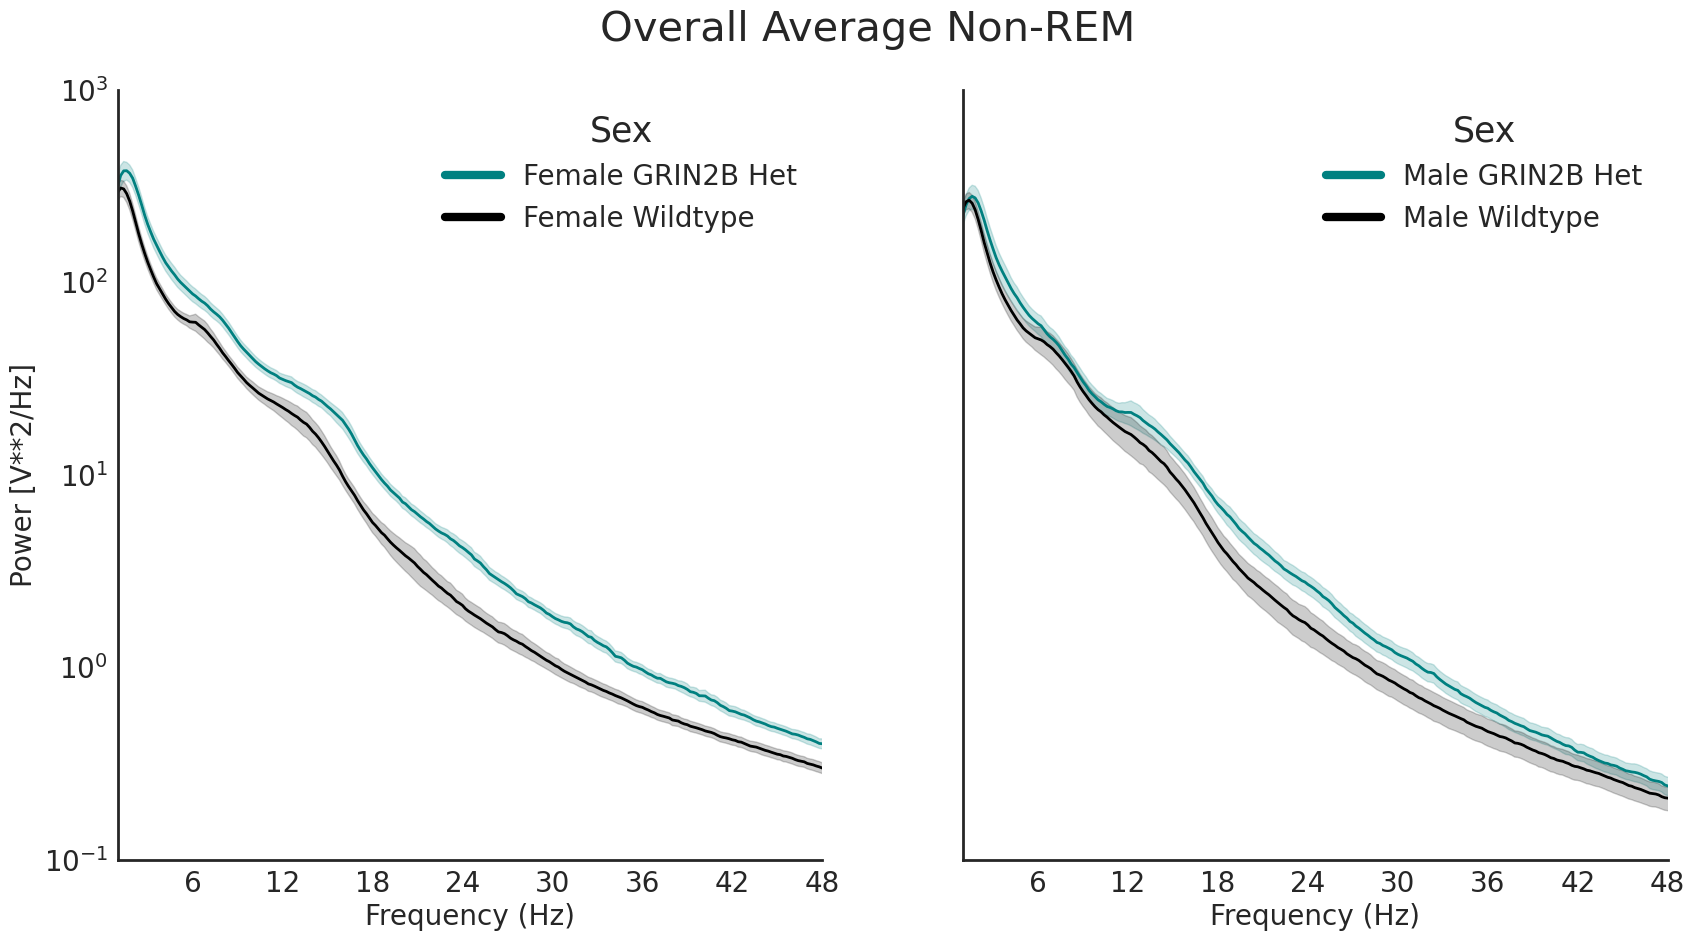

In [62]:
plotting = PlottingGRIN2B()
plotting.genotype_sex_subplots(female_data_chan_2_nrem, male_data_chan_2_nrem, sleepstage = 'Non-REM', 
                               save_path = save_directory_test, seizure = False) 

## Wake

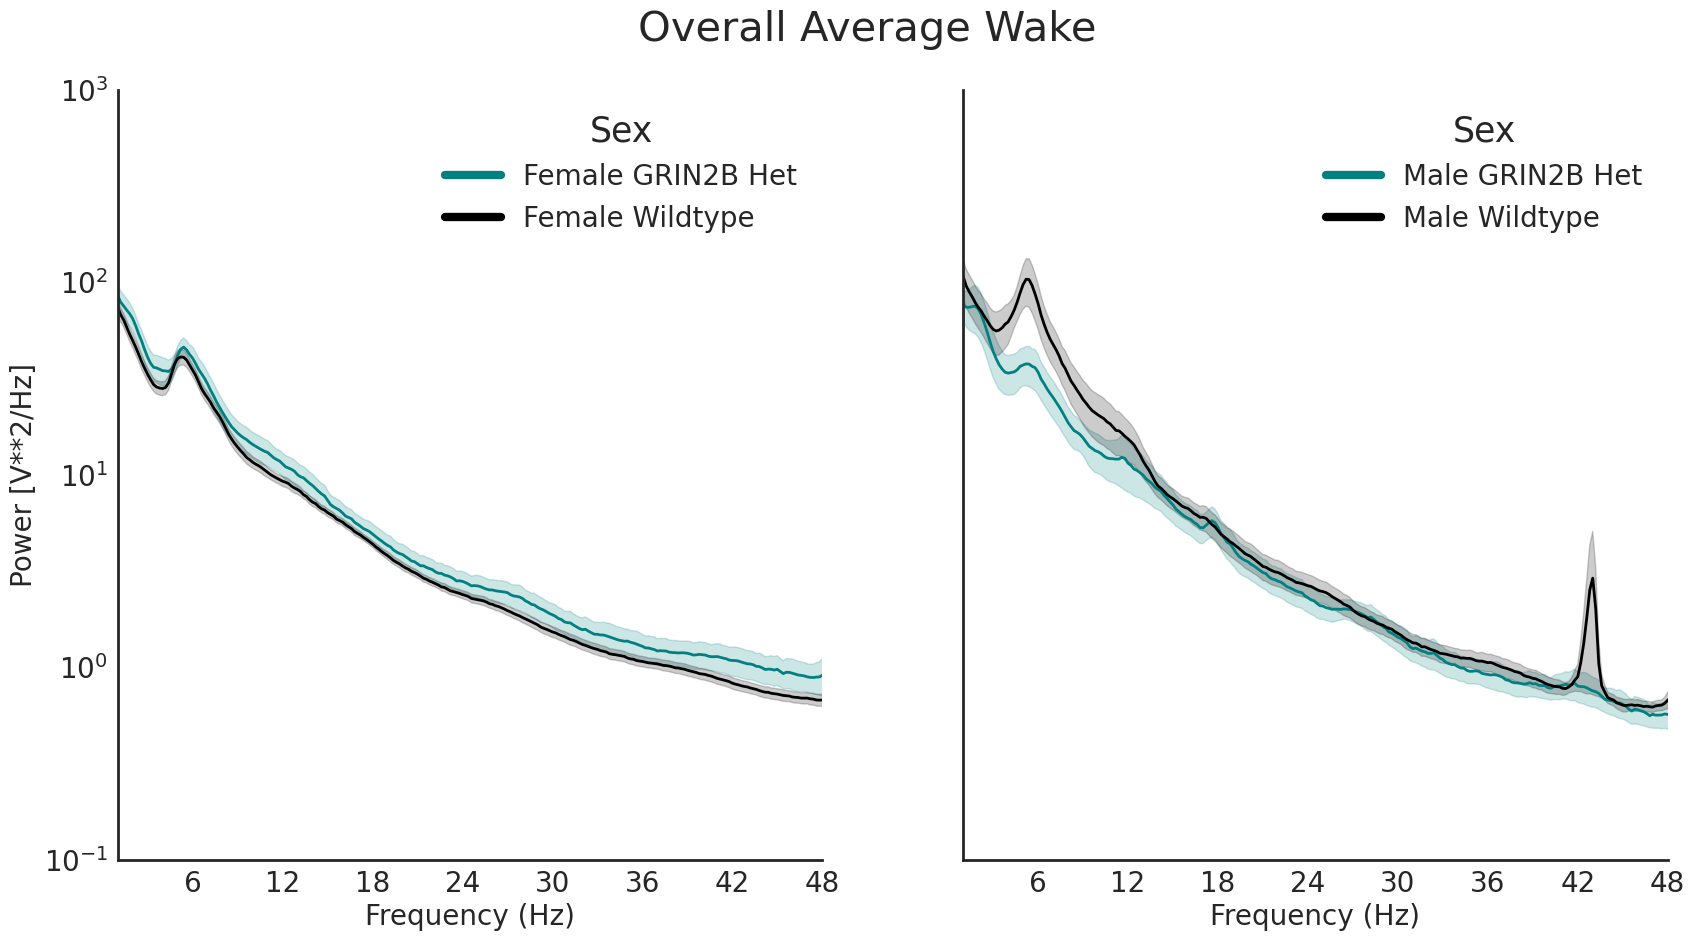

In [61]:
plotting = PlottingGRIN2B()
plotting.genotype_sex_subplots(female_data_chan_2_wake, male_data_chan_2_wake, sleepstage = 'Wake', 
                               save_path = save_directory_test, seizure = False) 

# Seizure 

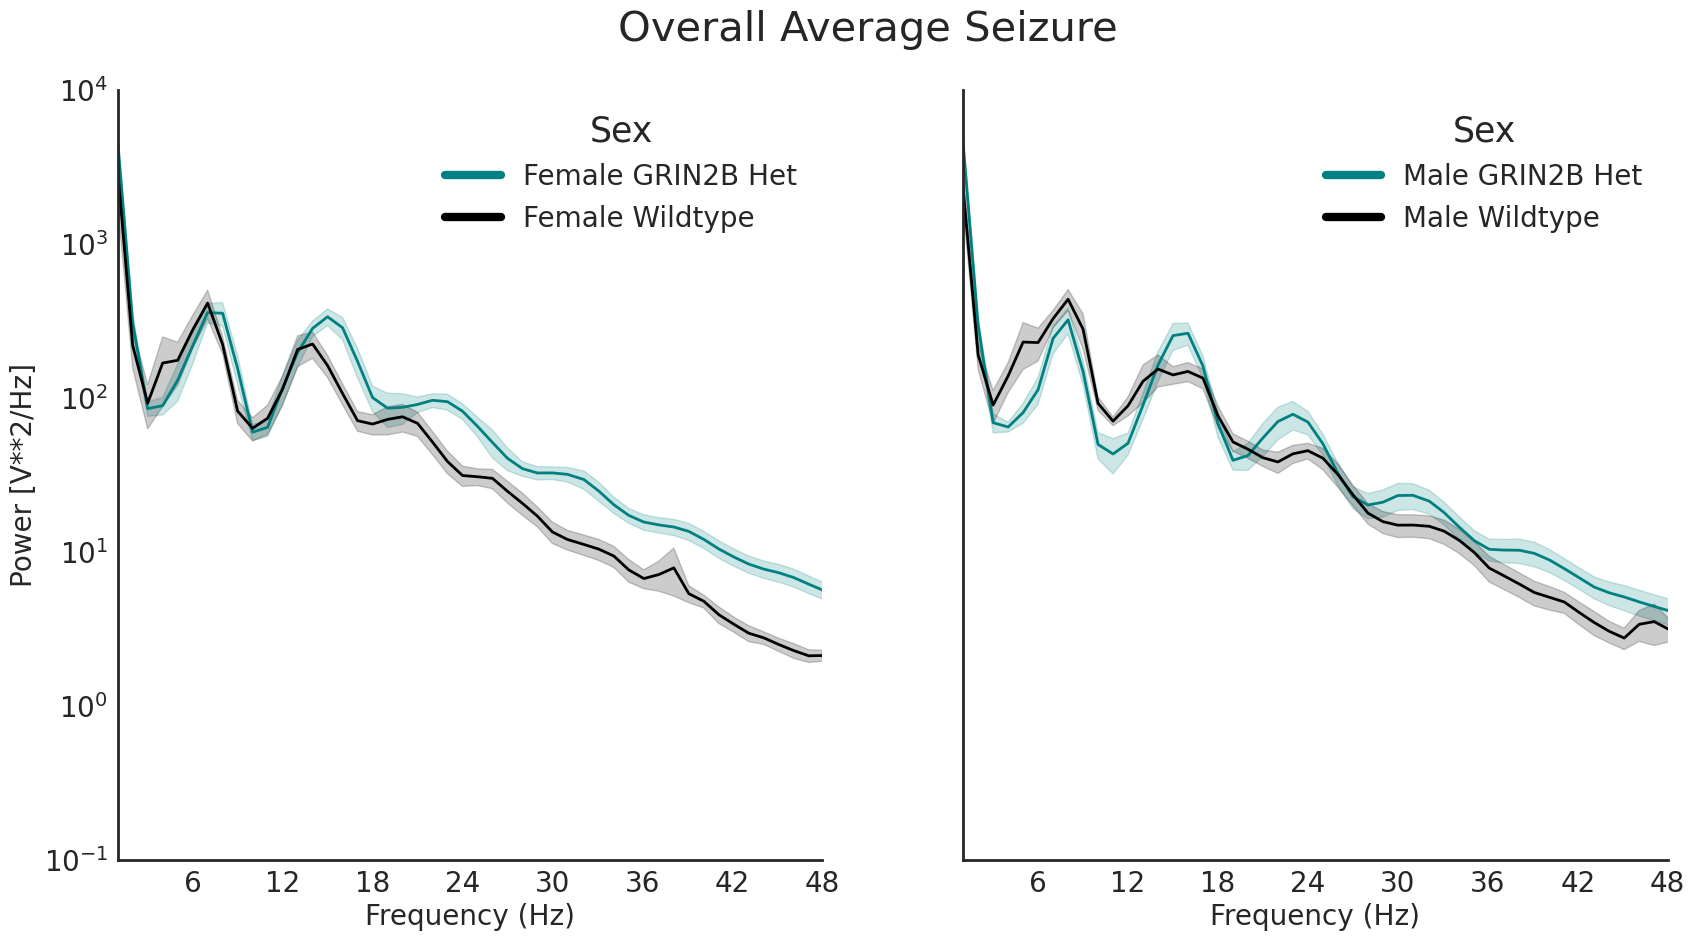

In [60]:
plotting = PlottingGRIN2B()
plotting.genotype_sex_subplots(female_data_chan_2_seizure, male_data_chan_2_seizure, sleepstage = 'Seizure', 
                               save_path = save_directory_test, seizure = True) 

# seizure IDs

In [ ]:
os.chdir('/home/melissa/RESULTS/GRIN2B/wake_plots_excluding_seizures')
seizures = pd.read_csv('seizure_GRIN2B_power.csv')
seizures_WT = seizures[seizures['Genotype'] == 'WT']
seizures_het = seizures[seizures['Genotype'] == 'GRIN2B']

In [ ]:
save_path = '/home/melissa/RESULTS/GRIN2B/seizures/excluded_animals'